# load packages and data

In [1]:
%reset -f

import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from scipy.stats                            import t
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime                               import datetime
from statsmodels.tsa.stattools              import adfuller
from statsmodels.tsa.arima.model            import ARIMA

In [2]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

# load data into Python

In [3]:
df = pd.read_excel('AuQuGDP.xlsx')

In [4]:
df.head()

,Time,AuGDP
0,1960-01-01,6.468300e+10
1,1960-04-01,6.647300e+10
2,1960-07-01,6.662300e+10
3,1960-10-01,6.649000e+10
4,1961-01-01,6.669000e+10


# set time index

In [5]:
df['date'] = pd.to_datetime(df['Time'])
df = df.set_index('date')
df.drop(['Time'], axis=1, inplace=True)
df.head()

,AuGDP
date,
1960-01-01,6.468300e+10
1960-04-01,6.647300e+10
1960-07-01,6.662300e+10
1960-10-01,6.649000e+10
1961-01-01,6.669000e+10


In [6]:
df.tail(1)

,AuGDP
date,
2020-01-01,4.788110e+11


In [7]:
df = df.rename(columns={"AuGDP": "Y"})

In [8]:
df.tail(6)

,Y
date,
2018-10-01,4.701400e+11
2019-01-01,4.722670e+11
2019-04-01,4.751560e+11
2019-07-01,4.777910e+11
2019-10-01,4.802800e+11
2020-01-01,4.788110e+11


# line plot of Y

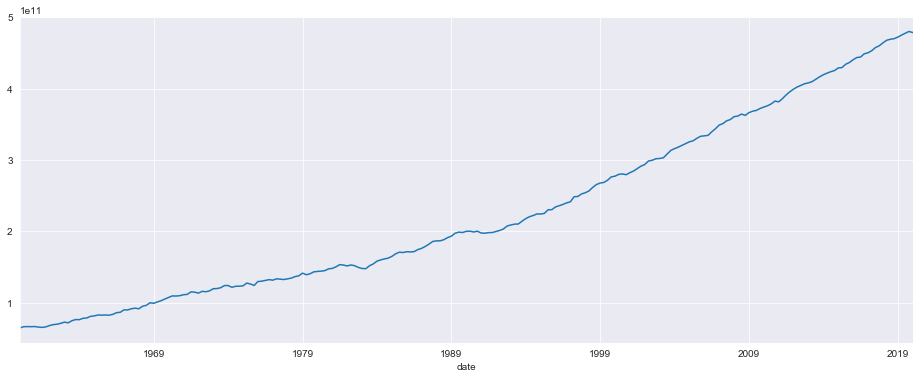

In [9]:
df['Y'].plot()
plt.show()

# ADF test of Y

## python does provide a function(specified as result2) to choose the optimal lag of ADF

In [10]:
df2 = df

X = df2['Y'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -0.346, 
 p-value: 0.988, 
 critical value: {'1%': -3.9969944961660877, '5%': -3.4289434905960645, '10%': -3.1378930946180557}
 ADF statistic: -0.346, 
 p-value: 0.988, 
 critical value: {'1%': -3.9969944961660877, '5%': -3.4289434905960645, '10%': -3.1378930946180557}


# ADF test of 1st order difference of Y

In [11]:
df2['Y_D1'] = df2['Y'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D1'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}
 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


# ADF test of 2nd order difference of Y

In [12]:
df2['Y_D2'] = df2['Y_D1'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D2'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -13.022, 
 p-value: 0.000, 
 critical value: {'1%': -3.997818933858586, '5%': -3.4293396709977557, '10%': -3.13812535054853}
 ADF statistic: -12.140, 
 p-value: 0.000, 
 critical value: {'1%': -3.9979881078231756, '5%': -3.4294209574472734, '10%': -3.138173000968399}


/Users/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# ADF test of 3rd order difference of Y

In [13]:
df2['Y_D3'] = df2['Y_D2'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D3'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -15.568, 
 p-value: 0.000, 
 critical value: {'1%': -3.9979881078231756, '5%': -3.4294209574472734, '10%': -3.138173000968399}
 ADF statistic: -10.687, 
 p-value: 0.000, 
 critical value: {'1%': -3.9990347583703216, '5%': -3.4299237913352556, '10%': -3.138467743111241}


# ADF test of 4th order difference of Y

In [14]:
df2['Y_D4'] = df2['Y_D3'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D4'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -18.335, 
 p-value: 0.000, 
 critical value: {'1%': -3.998158754122054, '5%': -3.429502948077832, '10%': -3.1382210632264758}
 ADF statistic: -9.394, 
 p-value: 0.000, 
 critical value: {'1%': -4.000328734182328, '5%': -3.430545275531156, '10%': -3.1388319837220435}


# ADF test of 5th order difference of Y

In [15]:
df2['Y_D5'] = df2['Y_D4'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D5'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -21.923, 
 p-value: 0.000, 
 critical value: {'1%': -3.9983308920613543, '5%': -3.4295856520805996, '10%': -3.1382695426857397}
 ADF statistic: -10.305, 
 p-value: 0.000, 
 critical value: {'1%': -4.000520408996994, '5%': -3.4306373191209616, '10%': -3.138885924117205}


# select of optimal p and q

In [16]:
df2 = df
df2['Y_D1'] = df2['Y'].diff()
df2 = df2.dropna(axis = 0)

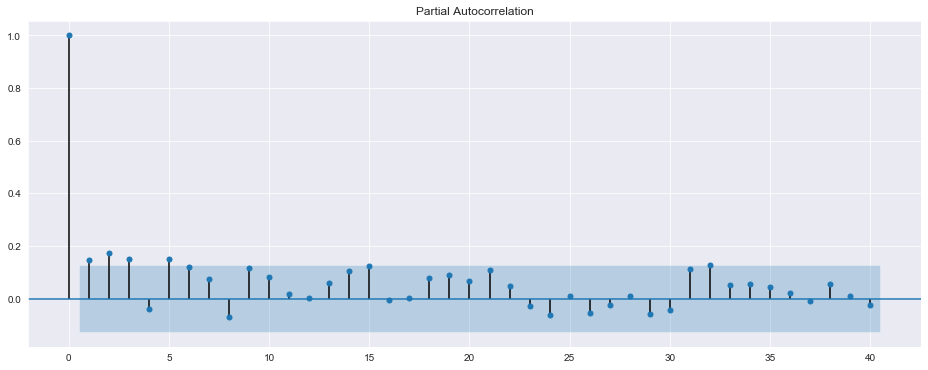

In [17]:
sm.graphics.tsa.plot_pacf(df2['Y_D1'].values.squeeze(), lags=40)
plt.show()

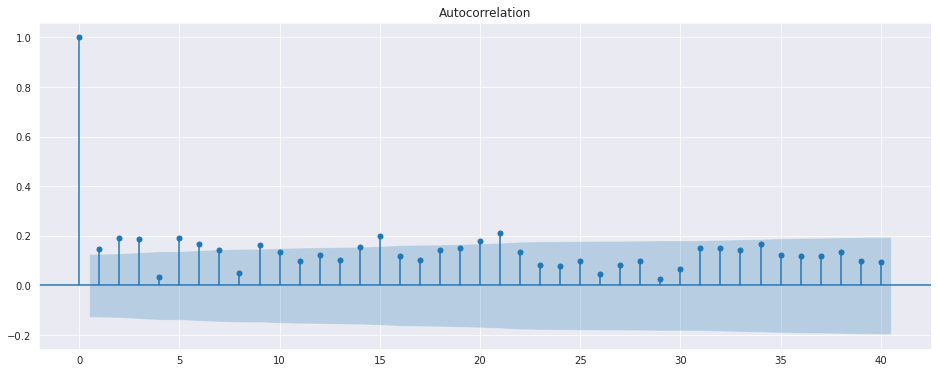

In [18]:
sm.graphics.tsa.plot_acf(df2['Y_D1'].values.squeeze(), lags=40)
plt.show()

# starting from $p=q=7$ and decrease the value of p and q gradually

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-inver

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(7, 1, 7)   Log Likelihood               -5308.984
Date:                Mon, 19 Oct 2020   AIC                          10647.968
Time:                        11:43:54   BIC                          10699.798
Sample:                    04-01-1960   HQIC                         10668.865
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5607      0.372     -4.200      0.000      -2.289      -0.832
ar.L2         -1.2810      0.295     -4.337      0.000      -1.860      -0.702
ar.L3         -0.4224      0.222     -1.903      0.0

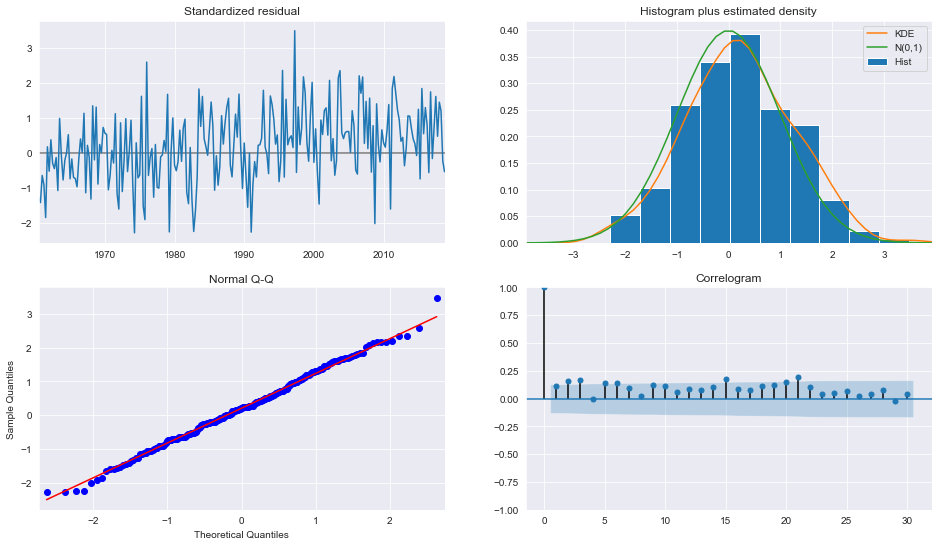

In [18]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(7,1,7))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-inver

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(6, 1, 7)   Log Likelihood               -5308.335
Date:                Mon, 19 Oct 2020   AIC                          10644.669
Time:                        11:49:23   BIC                          10693.044
Sample:                    04-01-1960   HQIC                         10664.174
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5085      1.192     -1.266      0.206      -3.844       0.827
ar.L2         -1.1113      0.670     -1.659      0.097      -2.424       0.202
ar.L3          0.1061      0.694      0.153      0.8

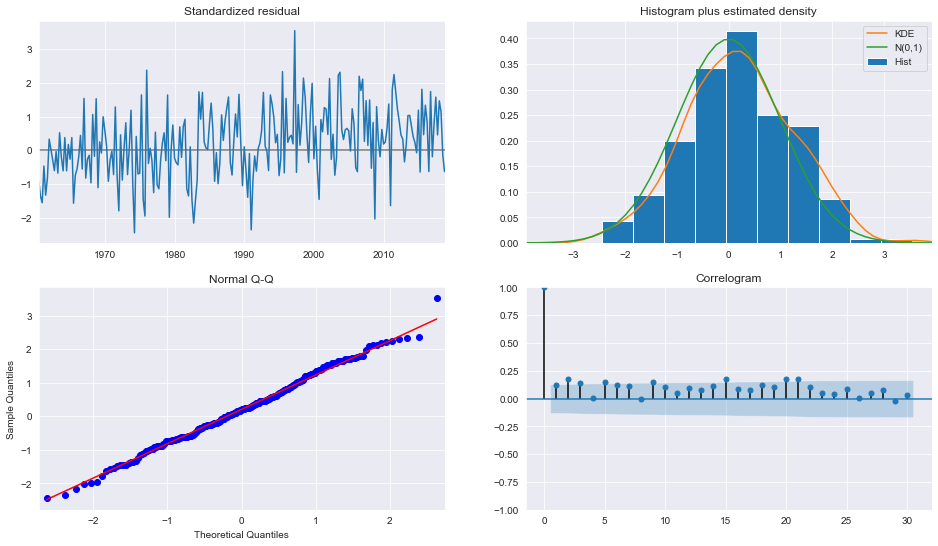

In [22]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,7))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(7, 1, 6)   Log Likelihood               -5308.648
Date:                Mon, 19 Oct 2020   AIC                          10645.295
Time:                        11:49:25   BIC                          10693.670
Sample:                    04-01-1960   HQIC                         10664.800
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3871      0.573     -2.419      0.016      -2.511      -0.263
ar.L2         -1.0554      0.357     -2.956      0.003      -1.755      -0.356
ar.L3          0.1165      0.260      0.449      0.6

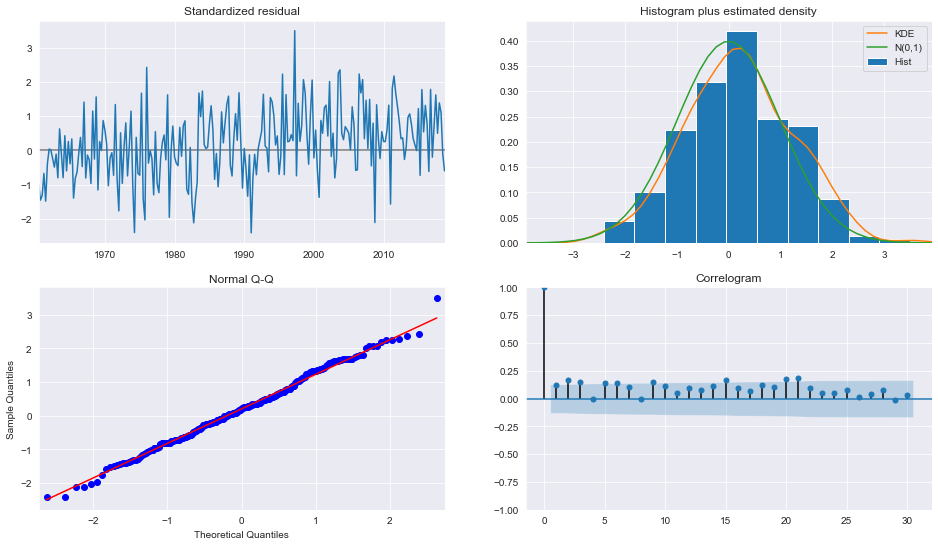

In [23]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(7,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -5309.034
Date:                Mon, 19 Oct 2020   AIC                          10644.068
Time:                        11:49:27   BIC                          10688.987
Sample:                    04-01-1960   HQIC                         10662.179
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4549      0.879     -1.655      0.098      -3.177       0.268
ar.L2         -1.0173      0.802     -1.268      0.205      -2.590       0.555
ar.L3          0.0988      0.222      0.445      0.6

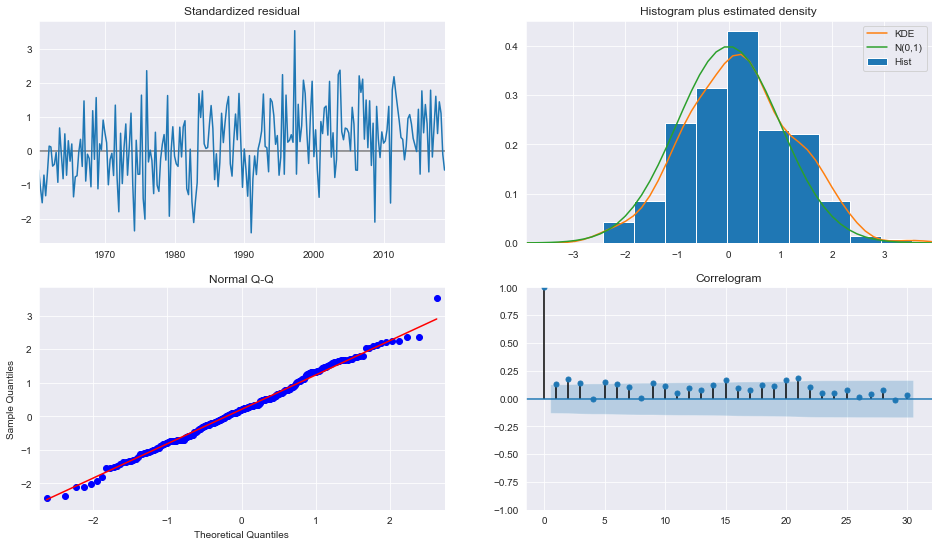

In [24]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(5, 1, 6)   Log Likelihood               -5308.932
Date:                Mon, 19 Oct 2020   AIC                          10641.863
Time:                        11:49:28   BIC                          10683.327
Sample:                    04-01-1960   HQIC                         10658.582
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9851      0.456     -2.163      0.031      -1.878      -0.092
ar.L2         -0.2217      0.097     -2.289      0.022      -0.412      -0.032
ar.L3          0.2816      0.078      3.591      0.0

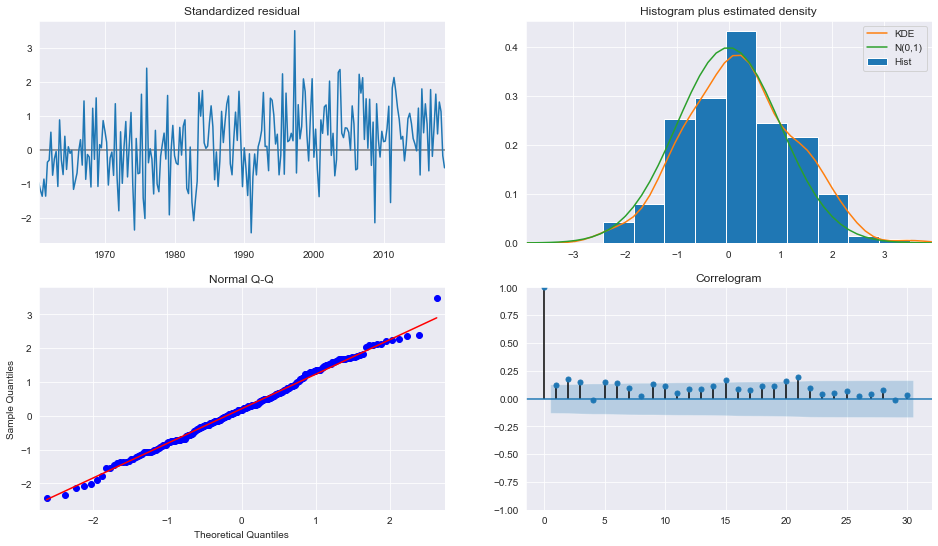

In [25]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(6, 1, 5)   Log Likelihood               -5309.218
Date:                Mon, 19 Oct 2020   AIC                          10642.436
Time:                        11:49:30   BIC                          10683.899
Sample:                    04-01-1960   HQIC                         10659.154
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0395      0.476     -2.182      0.029      -1.973      -0.106
ar.L2         -0.1855      0.083     -2.236      0.025      -0.348      -0.023
ar.L3          0.2512      0.076      3.319      0.0

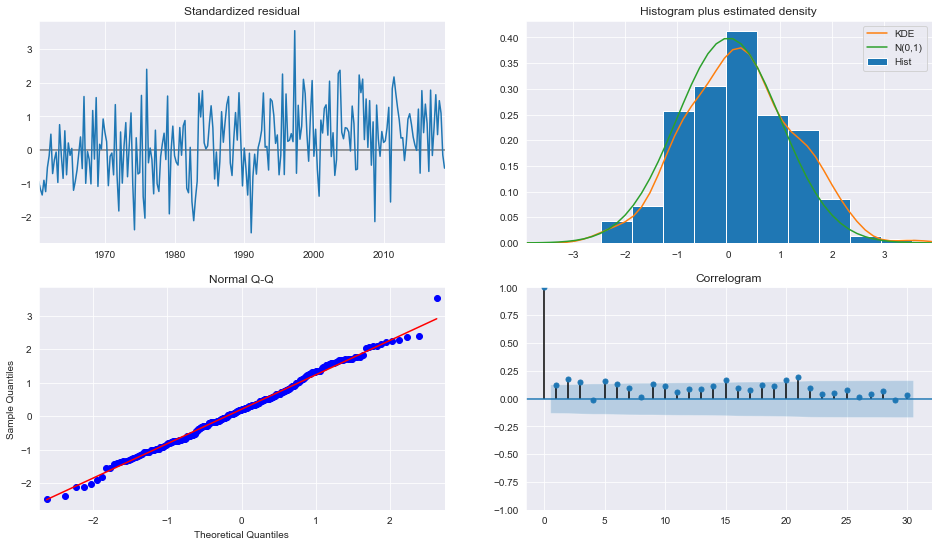

In [26]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,5))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [27]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,5))
res = mod.fit()
print(res.summary())

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -5309.133
Date:                Mon, 19 Oct 2020   AIC                          10640.265
Time:                        11:49:31   BIC                          10678.274
Sample:                    04-01-1960   HQIC                         10655.590
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1596      0.232     -4.990      0.000      -1.615      -0.704
ar.L2         -0.3756      0.091     -4.115      0.000      -0.555      -0.197
ar.L3          0.4447      0.043     10.342      0.0

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -5309.127
Date:                Mon, 19 Oct 2020   AIC                          10638.255
Time:                        11:49:32   BIC                          10672.808
Sample:                    04-01-1960   HQIC                         10652.187
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5154      0.173     -2.985      0.003      -0.854      -0.177
ar.L2          0.0151      0.088      0.172      0.863      -0.157       0.187
ar.L3          0.5159      0.084      6.119      0.0

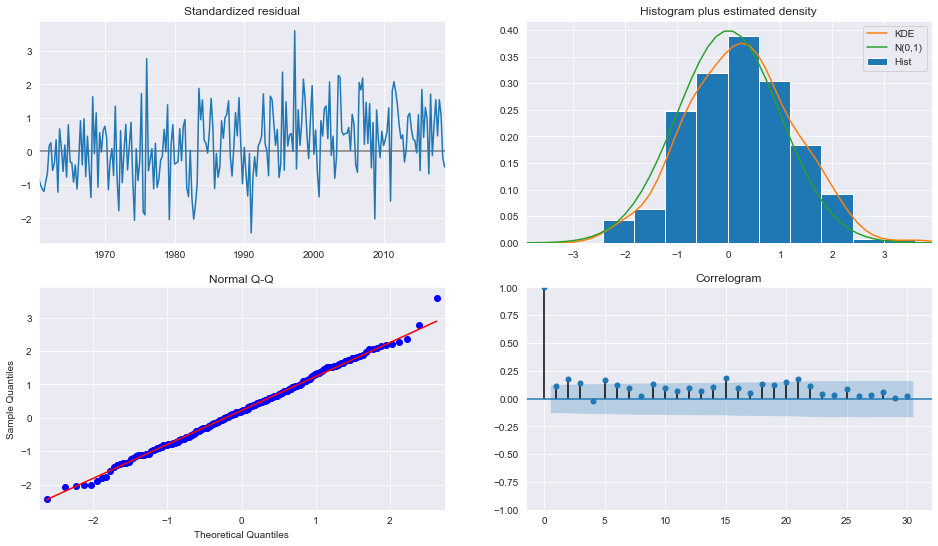

In [28]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,5))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -5309.806
Date:                Mon, 19 Oct 2020   AIC                          10639.612
Time:                        11:49:33   BIC                          10674.165
Sample:                    04-01-1960   HQIC                         10653.544
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9342      0.319     -2.927      0.003      -1.560      -0.309
ar.L2          0.0236      0.048      0.497      0.619      -0.070       0.117
ar.L3          0.9810      0.031     31.651      0.0

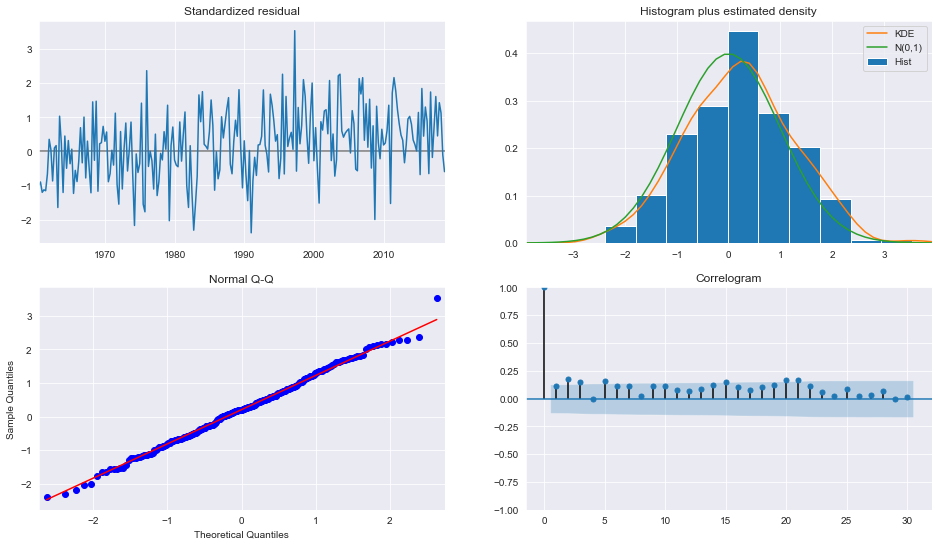

In [29]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -5308.598
Date:                Mon, 19 Oct 2020   AIC                          10635.196
Time:                        11:49:35   BIC                          10666.294
Sample:                    04-01-1960   HQIC                         10647.735
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0243      0.091    -11.274      0.000      -1.202      -0.846
ar.L2          0.0554      0.028      1.967      0.049       0.000       0.111
ar.L3          1.0627      0.028     37.340      0.0

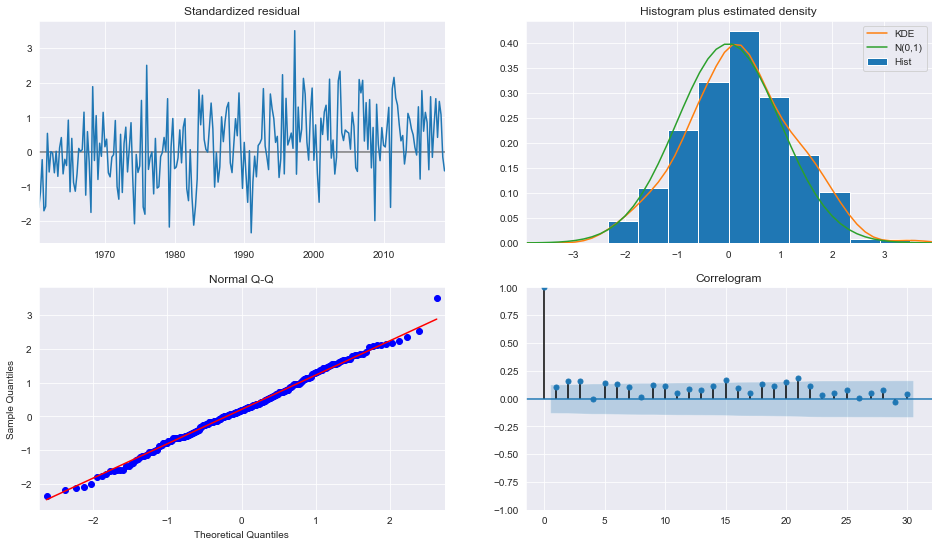

In [30]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -5307.246
Date:                Mon, 19 Oct 2020   AIC                          10630.492
Time:                        11:49:36   BIC                          10658.135
Sample:                    04-01-1960   HQIC                         10641.637
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8452      0.013    -67.108      0.000      -0.870      -0.821
ar.L2          0.8547      0.006    143.693      0.000       0.843       0.866
ar.L3          0.9906      0.012     84.263      0.0

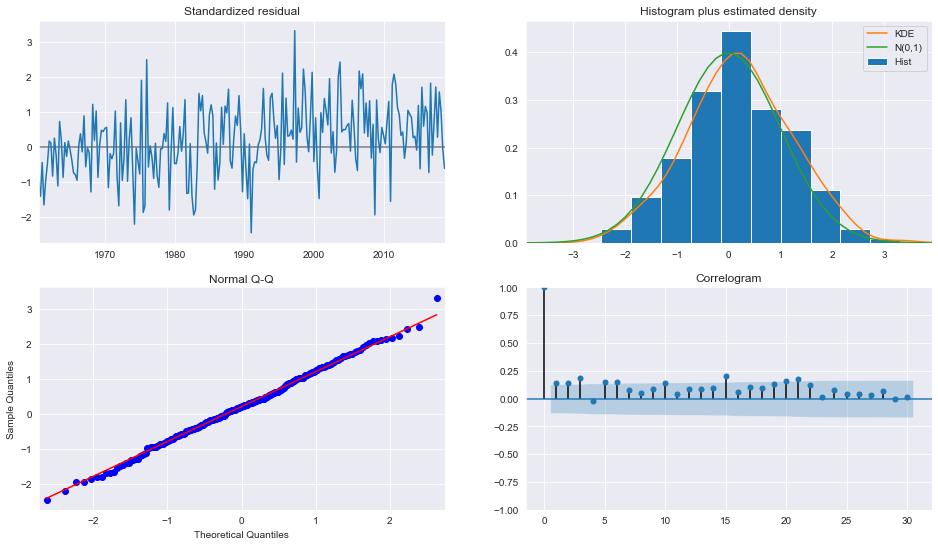

In [31]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -5307.566
Date:                Mon, 19 Oct 2020   AIC                          10631.132
Time:                        11:49:37   BIC                          10658.775
Sample:                    04-01-1960   HQIC                         10642.277
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8255      0.032    -25.638      0.000      -0.889      -0.762
ar.L2          0.8660      0.025     35.222      0.000       0.818       0.914
ar.L3          0.9721      0.030     32.866      0.0

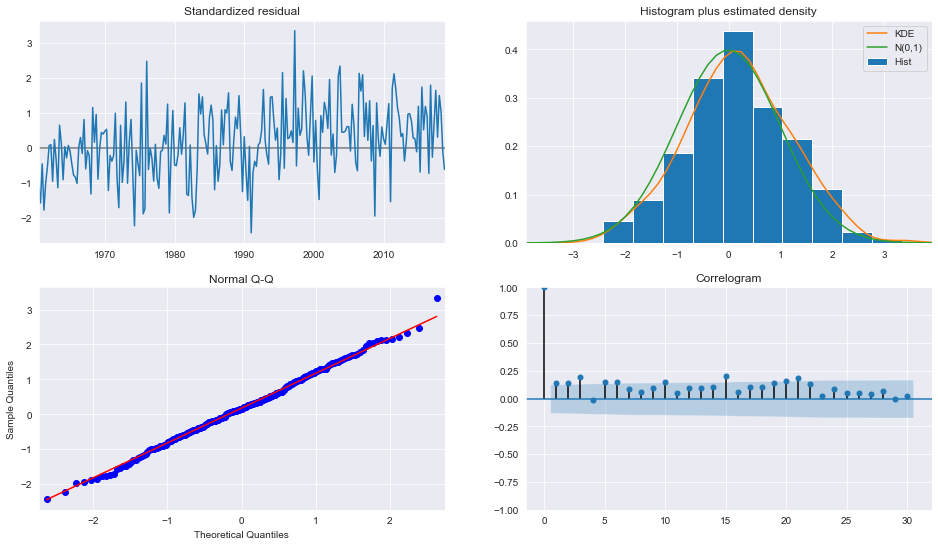

In [32]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -5308.976
Date:                Mon, 19 Oct 2020   AIC                          10631.953
Time:                        11:49:38   BIC                          10656.140
Sample:                    04-01-1960   HQIC                         10641.705
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4566      0.018    -25.799      0.000      -0.491      -0.422
ar.L2          0.4600      0.012     39.006      0.000       0.437       0.483
ar.L3          0.9967      0.017     59.444      0.0

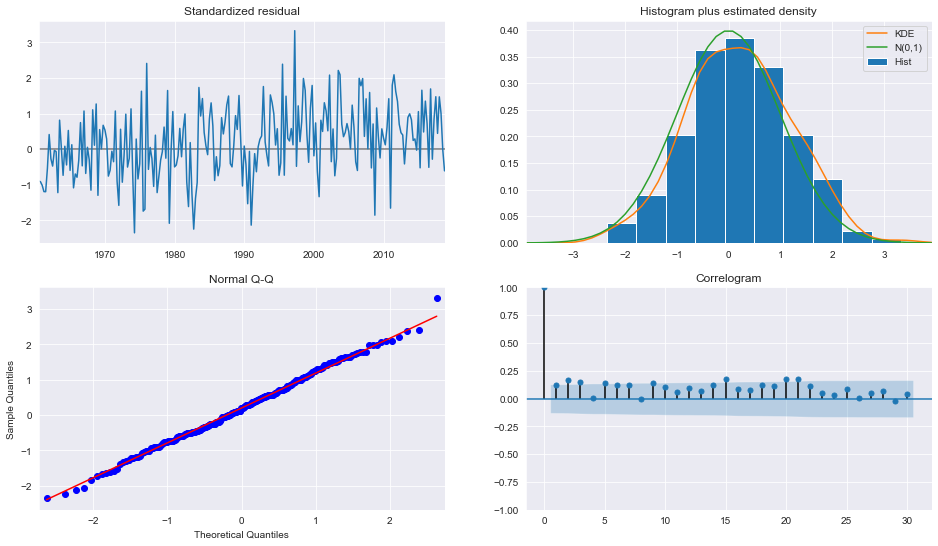

In [33]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -5310.381
Date:                Mon, 19 Oct 2020   AIC                          10632.763
Time:                        11:49:40   BIC                          10653.495
Sample:                    04-01-1960   HQIC                         10641.122
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0024      0.070      0.034      0.973      -0.136       0.140
ar.L2          0.9976      0.070     14.161      0.000       0.860       1.136
ma.L1         -0.0009      0.106     -0.009      0.9

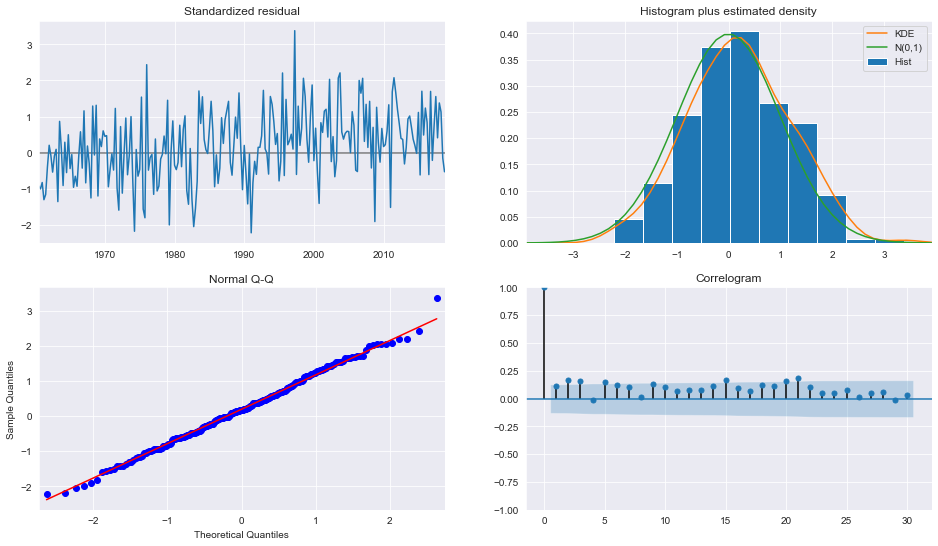

In [34]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-inver

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5310.461
Date:                Mon, 19 Oct 2020   AIC                          10632.922
Time:                        11:49:41   BIC                          10653.654
Sample:                    04-01-1960   HQIC                         10641.281
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0013      0.028      0.047      0.962      -0.053       0.056
ar.L2          0.9996      0.000   5891.377      0.000       0.999       1.000
ar.L3         -0.0010      0.028     -0.034      0.9

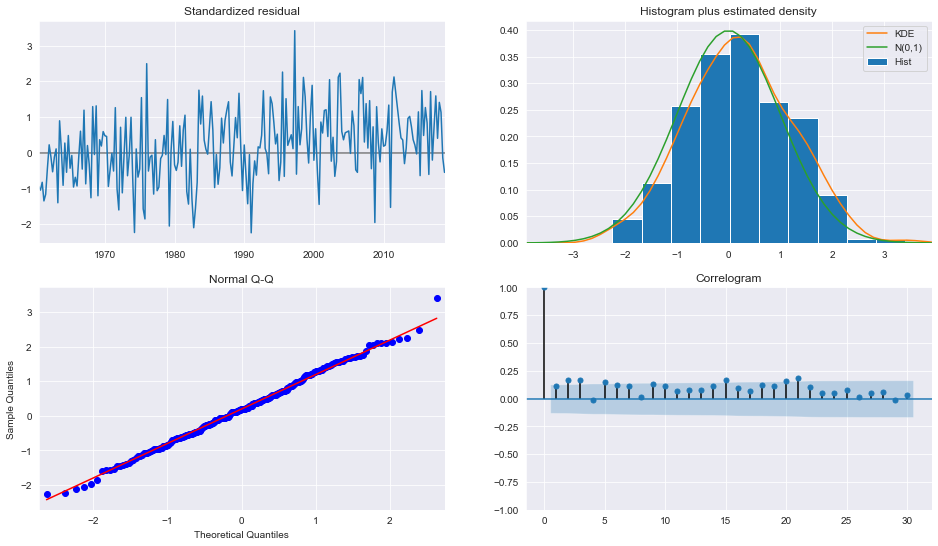

In [35]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-inver

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5310.382
Date:                Mon, 19 Oct 2020   AIC                          10630.763
Time:                        11:49:42   BIC                          10648.040
Sample:                    04-01-1960   HQIC                         10637.729
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0015      0.067      0.023      0.982      -0.131       0.134
ar.L2          0.9985      0.067     14.847      0.000       0.867       1.130
ma.L1         -0.0006      0.108     -0.006      0.9

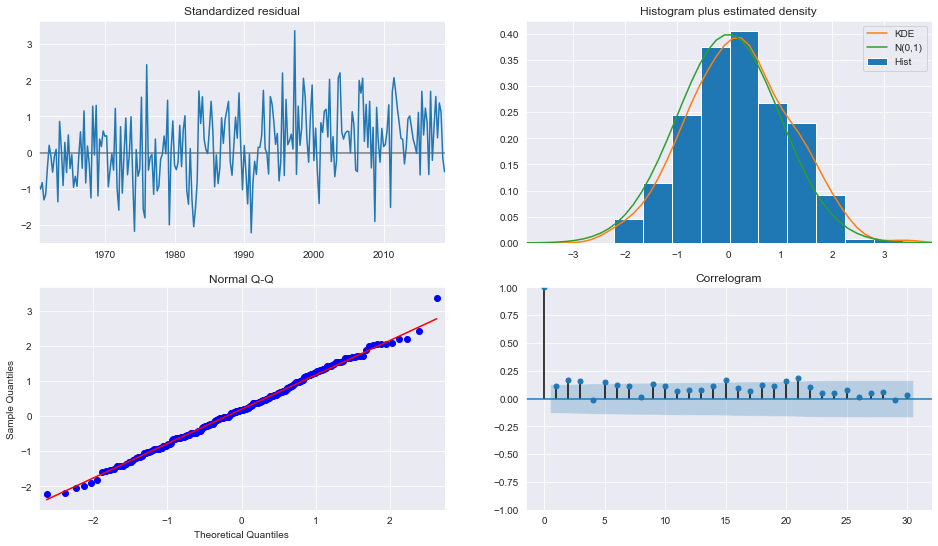

In [36]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(se

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5310.572
Date:                Mon, 19 Oct 2020   AIC                          10629.144
Time:                        11:49:43   BIC                          10642.966
Sample:                    04-01-1960   HQIC                         10634.717
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    606.508      0.000       0.997       1.003
ma.L1         -0.9982      0.067    -14.919      0.000      -1.129      -0.867
ma.L2         -0.0011      0.028     -0.038      0.9

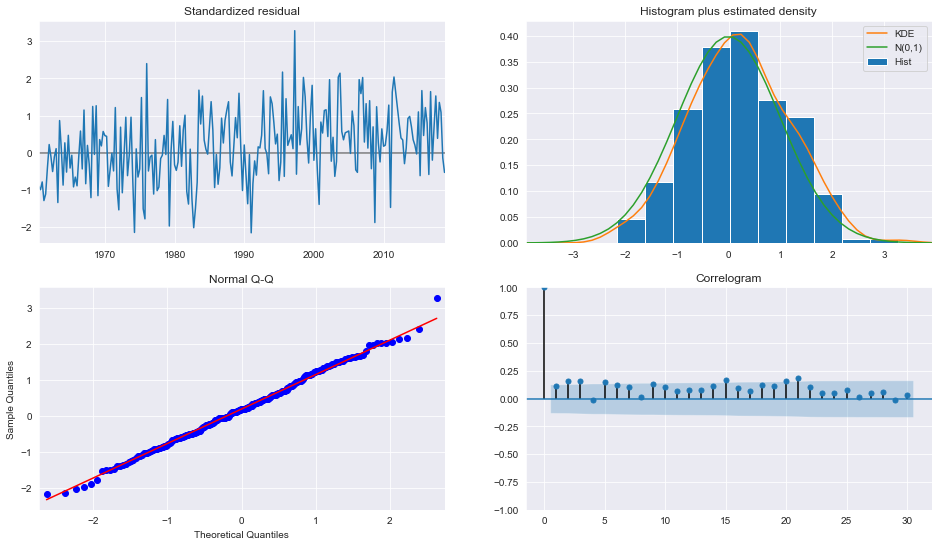

In [37]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5310.511
Date:                Mon, 19 Oct 2020   AIC                          10629.022
Time:                        11:49:45   BIC                          10642.843
Sample:                    04-01-1960   HQIC                         10634.594
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0014      0.028     36.198      0.000       0.947       1.056
ar.L2         -0.0014      0.027     -0.053      0.958      -0.055       0.052
ma.L1         -0.9992      0.059    -16.993      0.0

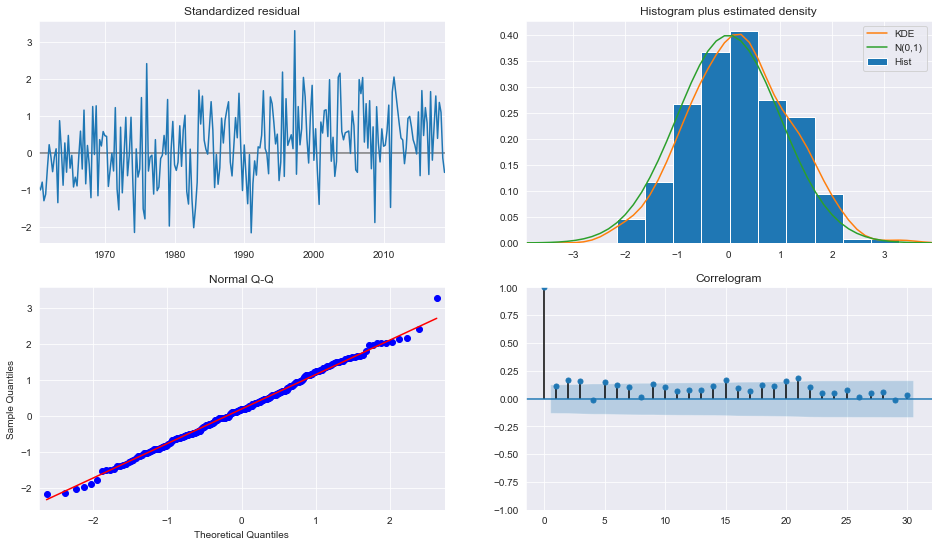

In [38]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5310.516
Date:                Mon, 19 Oct 2020   AIC                          10627.033
Time:                        11:49:46   BIC                          10637.399
Sample:                    04-01-1960   HQIC                         10631.212
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    679.184      0.000       0.997       1.003
ma.L1         -0.9994      0.069    -14.581      0.000      -1.134      -0.865
sigma2      3.121e+18        nan        nan        n

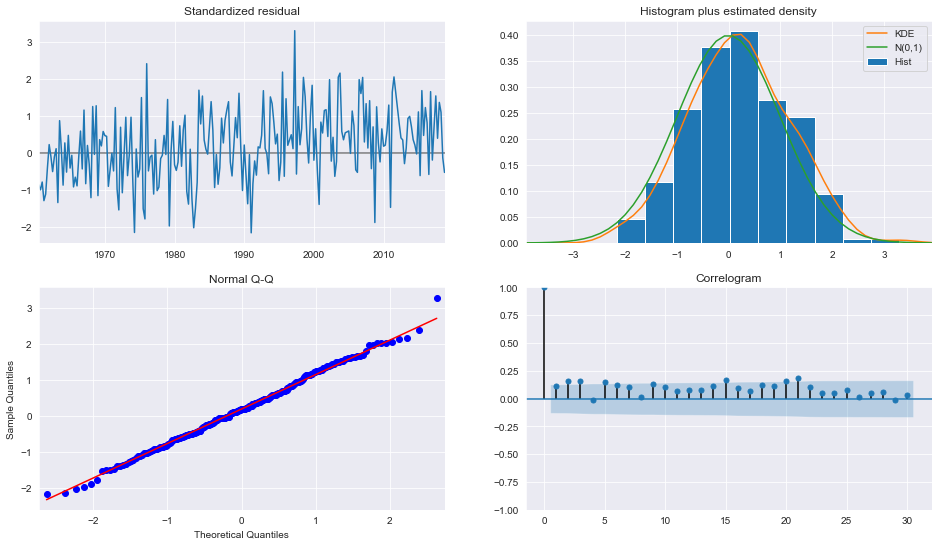

In [39]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -5382.353
Date:                Mon, 19 Oct 2020   AIC                          10768.706
Time:                        11:49:47   BIC                          10775.617
Sample:                    04-01-1960   HQIC                         10771.492
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1182      0.012      9.836      0.000       0.095       0.142
sigma2      5.889e+18   9.65e-23    6.1e+40      0.000    5.89e+18    5.89e+18
Ljung-Box (Q):                      114.16   Jarque-

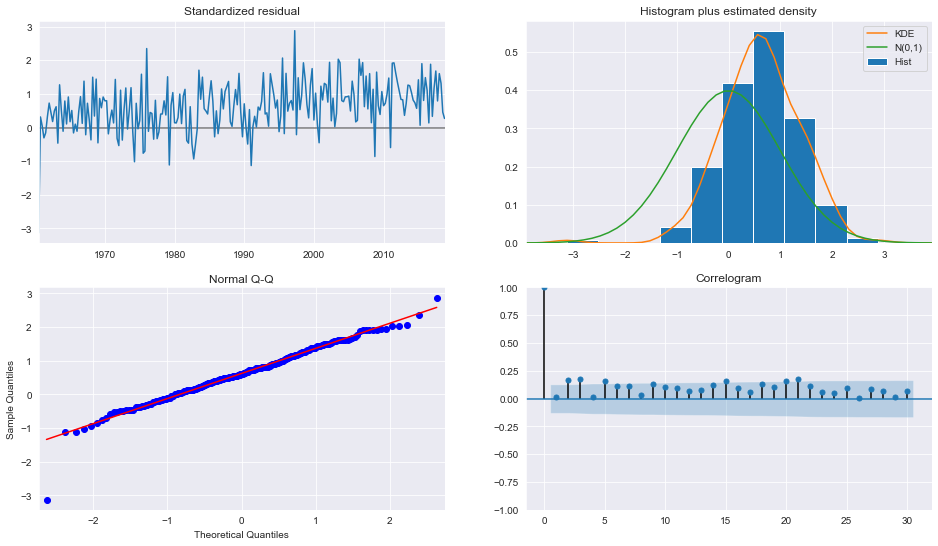

In [40]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(0,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5386.664
Date:                Mon, 19 Oct 2020   AIC                          10777.329
Time:                        11:49:47   BIC                          10784.239
Sample:                    04-01-1960   HQIC                         10780.115
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1397      0.007     21.333      0.000       0.127       0.153
sigma2      4.013e+18   9.65e-23   4.16e+40      0.000    4.01e+18    4.01e+18
Ljung-Box (Q):                       96.28   Jarque-

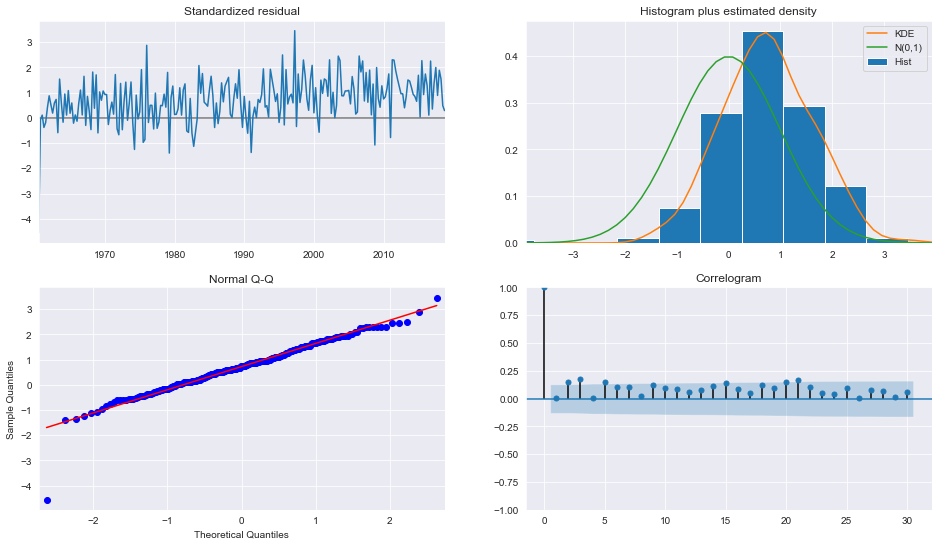

In [41]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,0))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5390.251
Date:                Mon, 19 Oct 2020   AIC                          10782.501
Time:                        11:49:48   BIC                          10785.957
Sample:                    04-01-1960   HQIC                         10783.895
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.941e+18    6.3e+17      9.423      0.000    4.71e+18    7.18e+18
Ljung-Box (Q):                      188.54   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.00   Pr

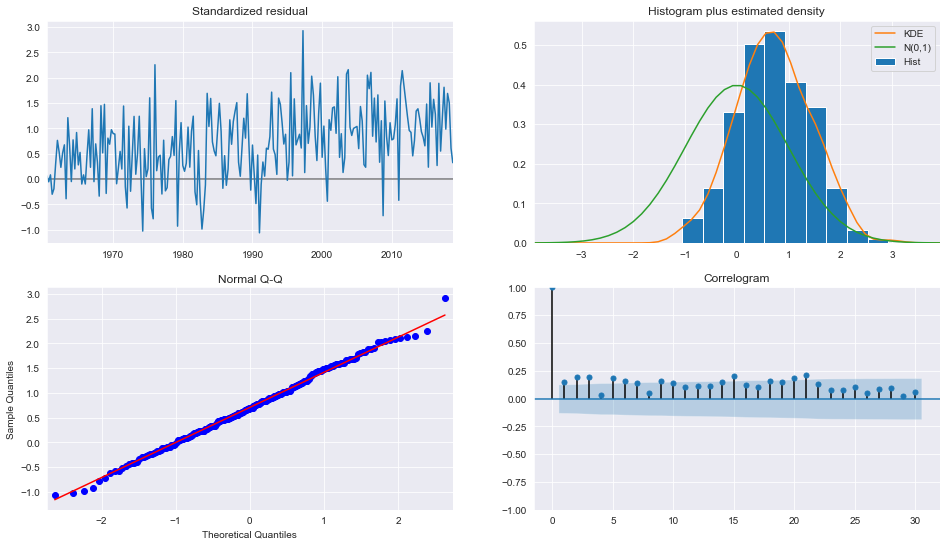

In [42]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(0,1,0))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

# Different from Stata, both AIC and BIC agree that $p=q=1$ is the optimal

In [43]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,1))
res = mod.fit()
print(res.summary())

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5310.516
Date:                Mon, 19 Oct 2020   AIC                          10627.033
Time:                        11:50:43   BIC                          10637.399
Sample:                    04-01-1960   HQIC                         10631.212
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    679.184      0.000       0.997       1.003
ma.L1         -0.9994      0.069    -14.581      0.000      -1.134      -0.865
sigma2      3.121e+18        nan        nan        n

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


# for $p=q=1$, the Ljung-Box test for all lag value less or equal to 40

In [44]:
sm.stats.acorr_ljungbox(res.resid, return_df=True)

/Users/ning/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)


,lb_stat,lb_pvalue
1,0.022633,0.880415
2,0.032382,0.983940
3,0.032958,0.998424
4,0.355307,0.985970
5,0.385731,0.995714
6,0.386907,0.998956
7,0.440426,0.999637
8,0.447373,0.999913
9,0.447390,0.999981
10,0.459161,0.999996


In [54]:
res.predict()

1960-04-01    0.000000e+00
1960-07-01    6.817021e+10
1960-10-01    6.828167e+10
1961-01-01    6.810514e+10
1961-04-01    6.827156e+10
                  ...     
2017-10-01    4.594042e+11
2018-01-01    4.618068e+11
2018-04-01    4.659338e+11
2018-07-01    4.695960e+11
2018-10-01    4.710790e+11
Freq: QS-OCT, Name: predicted_mean, Length: 235, dtype: float64

In [55]:
res.forecast(steps=5)

2019-01-01    4.718616e+11
2019-04-01    4.735831e+11
2019-07-01    4.753047e+11
2019-10-01    4.770262e+11
2020-01-01    4.787477e+11
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [56]:
df2['Y']

date
1960-04-01    6.647300e+10
1960-07-01    6.662300e+10
1960-10-01    6.649000e+10
1961-01-01    6.669000e+10
1961-04-01    6.595800e+10
                  ...     
2019-01-01    4.722670e+11
2019-04-01    4.751560e+11
2019-07-01    4.777910e+11
2019-10-01    4.802800e+11
2020-01-01    4.788110e+11
Name: Y, Length: 240, dtype: float64